In [2]:
!pip install matplotlib
!pip install gekko

from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

#number of points in time discretization
n = 91

#Initialize Model
m = GEKKO(remote=False)

#define time discretization
m.time = np.linspace(0,90,n)

#make array of drag coefficients, changing at time 60
drag = [(0.2 if t<=60 else 10) for t in m.time]

#define constants
g = m.Const(value=9.81)
mass = m.Const(value=80)

#define drag parameter
d = m.Param(value=drag)

#initialize variables
x,y,vx,vy,v,Fx,Fy = [m.Var(value=0) for i in range(7)]

#initial conditions
y.value = 5000
vx.value = 50

#Equations
# momentum balance
m.Equation(Fx == -d * vx**2)
m.Equation(Fy == -mass*g + d*vy**2)
#F = ma
m.Equation(Fx/mass == vx.dt())
m.Equation(Fy/mass == vy.dt())
#vel = dxdt
m.Equation(vx == x.dt())
m.Equation(vy == y.dt())
#total velocity
m.Equation(v == (vx**2 + vy**2)**.5)

#Set global options
m.options.IMODE = 4 #dynamic simulation

#Solve simulation
m.solve()




[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
 ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            2
   Variables    :            8
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:            990
 Number of total equations: -          990
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ------------------

Very first one is just the trajectory of the skydiver in the Y and X direction so jumping out of a plane that's moving at 50 meters per second and then you can see the effect of gravity as the skydiver begins to fall they're still traveling in the forward direction but there is a drag coefficient and the x and y direction we're assuming that the you know skydiver is a sphere but in reality it's gonna he's gonna have or she is gonna have different drag coefficient in different directions okay so you just make an approximation here let this point right here the skydiver opens a chute and then begins to fall more slowly.

Text(0.5, 1.0, '2D Plot of SkyDiver Trajectory')

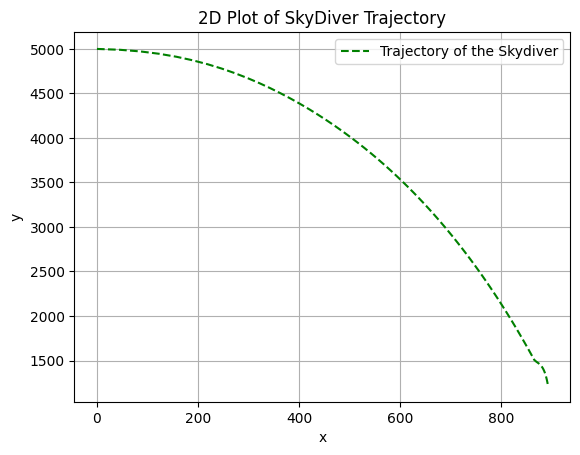

In [3]:

#%% Plot results
plt.figure(1)
plt.plot(x.value,y.value,'g--',label='Trajectory of the Skydiver')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(); plt.grid()

# Adding a Title and Subtitle
plt.title("2D Plot of SkyDiver Trajectory")



Now, we have the y-direction there so you can see the elevation with time in a certain point around 900, the chute opens and the skydiver falls
more slowly and then you can also see the extra drag and so skydiver is going forward but then only goes about nine hundred meters beyond
where the skydiver started and then kind of levels out in the x-direction even before the chute opened so this point the chute opens at sixty seconds.

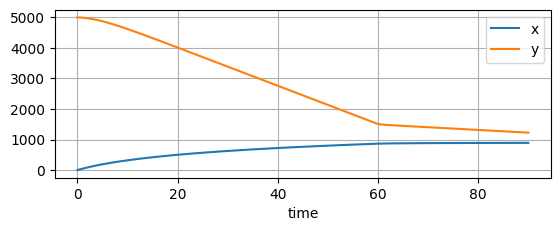

In [4]:
plt.figure(2)
plt.subplot(2,1,1)
plt.plot(m.time,x.value,label='x')
plt.plot(m.time,y.value,label='y')
plt.xlabel('time')
plt.legend(); plt.grid()


Finally, You can see some of the dynamics change there and the final one is a velocity in the X and y direction so you can see the velocity in the X Direction was already decreasing towards zero okay but then when the chute opens at 60 seconds, the velocity decreases even faster toward zero and then you can also see these velocity in the Y direction the skydiver jumps, it's got ever accelerates downward you got a velocity and then at this point reaches got reaches a terminal velocity about negative 70 meters per second and then when the chute opens the skydiver decelerates and reaches a stay state all fall rate about five meters per second, so that's the velocity for the x and y two-dimensional trajectory of the skydiver as a skydiver went down.

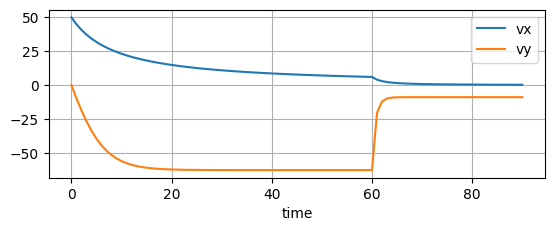

In [5]:

plt.subplot(2,1,2)
plt.plot(m.time,vx.value,label='vx')
plt.plot(m.time,vy.value,label='vy')
plt.xlabel('time')
plt.legend(); plt.grid()

plt.show()